#         Pima Indians - diabetes prediction
   ## Neural Network for binary classification 

                                                                                                  by: Karima Tajin

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.
/Users/karimaidrissi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/karimaidrissi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/karimaidrissi/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/karimaidrissi

### Load and Split Pima-Indians-Diabetes dataset

In [2]:
# chanding the directory
os.chdir("/Users/karimaidrissi/Desktop/DSSA 5104 DL/week12")

# set random seed for reproducibility
np.random.seed(7)

# load the dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# start splitting pima-indians-diabetes dataset into observed features(input) and targets variable(output)
X = dataset[:,0:8] # features values
Y = dataset[:,8]# targets variable either 0 or 1

### Build a Simple model

In [3]:
# build a simple model of Neural Network
model = Sequential()
model.add(Dense(12,input_dim=8,activation="relu"))# adding 8 input neurons with 12 hidden layers by using relu activation function
model.add(Dense(12,activation="relu")) # adding 12 hidden layers by using relu activation function
model.add(Dense(1,activation="sigmoid")) # adding 1 otput layers by using Sigmoid function

### Compile our Model using Binary Cross-entropy

- Binary Cross-entropy or log loss is best used for classification model where the output is binary 

In [4]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01), metrics= ["accuracy"])

# train the model by passing X and Y with 100 iterations
# setting validation_split to separate 20% of the training data into a validation dataset that
# can be used to evaluate our model
history= model.fit(X,Y, epochs=150,validation_split=0.20,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
768/768 [==============================] - 0s 17us/step

accuracy: 78.12%
Confusion Matrix
True negatives:  428
False negatives:  96
False positives:  72
True positives:  172


- The accuracy of our model with 100 epochs and 0.01 learning rate  is 78.12%
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 600 observation were correctly predicted while 168 were incorrectly predicted
- we can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 600/768= 0.7812 which gives 78.12%

### Plotting The Accuracy and Loss of our Model with 0.01 LR

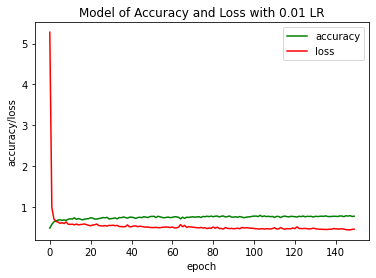

In [5]:
# summarize history for accuracy:
#print('Accuracy', history.history["accuracy"]) # print history for accuracy
#print('Loss',history.history["loss"])  # print history for loss
plt.plot(history.history["accuracy"], c = "g")
plt.plot(history.history["loss"], c ="r")
plt.title("Model of Accuracy and Loss with 0.01 LR")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

- The Plot shows that the Accuracy increases while the Loss decrease with 150 iterations and 0.01 learning rate

### Different Learning Rate and epochs

In [6]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.005), metrics= ["accuracy"])

# train the model by passing X and Y with 100 iterations
# setting validation_split to separate 20% of the training data into a validation dataset that
# can be used to evaluate our model
history= model.fit(X,Y, epochs=500,validation_split=0.20,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
768/768 [==============================] - 0s 17us/step

accuracy: 80.60%
Confusion Matrix
True negatives:  430
False negatives:  79
False positives:  70
True positives:  189


- The accuracy of our model increase to 80.60% whith a lower learning rate and 500 iterations
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 619 observations were correctly predicted while 149 were incorrectly predicted
- we can also calculate the accuracy of our model by adding True negatives and True positive then divide the sum by the total number of observations: 619/768= 0.8060 which means 80.60%

### Plotting The Accuracy and Loss of our Model with 0.005 LR

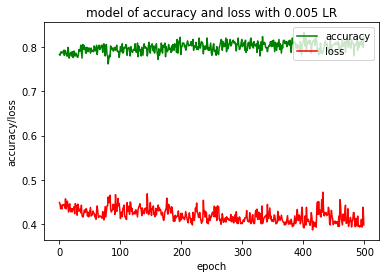

In [7]:
# summarize history for accuracy:
#print('Accuracy', history.history["accuracy"]) # print history for accuracy
#print('Loss',history.history["loss"])  # print history for loss
plt.plot(history.history["accuracy"], c="g")
plt.plot(history.history["loss"], c="r")
plt.title("model of accuracy and loss with 0.005 LR")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

- The plot shows that the accuracy increase while the loss decrease 

### Different Learning Rate and epochs

In [8]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.0008), metrics= ["accuracy"])

# train the model by passing X and Y with 1500 iterations
# setting validation_split to separate 20% of the training data into a validation dataset that
# can be used to evaluate our model
history= model.fit(X,Y, epochs=1500,validation_split=0.20,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
768/768 [==============================] - 0s 20us/step

accuracy: 81.64%
Confusion Matrix
True negatives:  452
False negatives:  93
False positives:  48
True positives:  175


- The accuracy of our model increase to 81.64 % whith a lower learning rate and 1500 iterations
- The confusion matrix can be interpreted as follows out of 768 observations in Pima-Indians-Diabetes dataset, 627 observations were correctly predicted while 141 were incorrectly predicted
- we can also calculate the accuracy of our model by adding True negatives and True positive then divide the sum by the total number of observations: 627/768= 0.8164 which gives 81.64%

### Plotting The Accuracy and Loss of our Model with 0.0008 LR

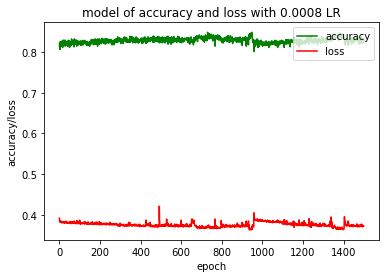

In [9]:
# summarize history for accuracy:
#print('Accuracy', history.history["accuracy"]) # print history for accuracy
#print('Loss',history.history["loss"])  # print history for loss
plt.plot(history.history["accuracy"], c="g")
plt.plot(history.history["loss"], c="r")
plt.title("model of accuracy and loss with 0.0008 LR")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

### Compile our Model using Mean_Squared_Error

- Mean_Squared_Error(MSE) is one of the best loss function for regression model

In [14]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics.
model.compile(loss='mean_squared_error',optimizer=Adam(lr=0.01), metrics= ["accuracy"])

# train the model by passing X and Y with 100 iterations
# setting validation_split to separate 20% of the training data into a validation dataset that
# can be used to evaluate our model
history= model.fit(X,Y, epochs=150,validation_split=0.20,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
768/768 [==============================] - 0s 19us/step

accuracy: 65.10%
Confusion Matrix
True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


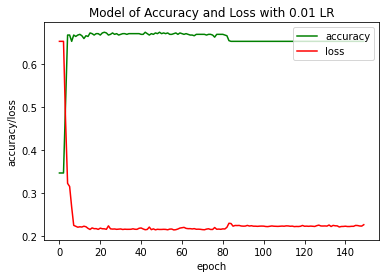

In [15]:
plt.plot(history.history["accuracy"], c = "g")
plt.plot(history.history["loss"], c ="r")
plt.title("Model of Accuracy and Loss with 0.01 LR")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

### Conclusion:

- We can conclude that learning rate has an important role in training our Neural Network model because it 
  can help us to increase our model accuracy and decrease into areas of lower loss. 
 
  
- The model shows that while the accuracy increase, the loss rate decrease with adjusting learning rate and iterations

- In this project is better to use Binary Cross-entropy loss because we are trying to predict categorical output either 1 or 0 means either a person will develop diabetes or no.

-----------------------------------------------------------------------------------------------------------------

## Voting records - party prediction
## Neural Network for binary classification

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder # will be use to encode target labels with value 0 and 1 

Using TensorFlow backend.


In [6]:
# chanding the directory
os.chdir("/Users/karimaidrissi/Desktop/DSSA 5104 DL/week12")

# set random seed for reproducibility
np.random.seed(7)

# load the dataset
voting_data = pd.read_csv("votingrecords.csv", header = None)

# Convert the categorical features into numerical values by applying LabelEncoder 
voting_data1 = voting_data.apply(LabelEncoder().fit_transform)
voting_data2 = voting_data1.to_numpy()
print(voting_data2) # convert the dataset1 to numpy array by using to_numpy() function

# start splitting Voting-records dataset into observed features(input) and targets variable(output)
X = voting_data2[:,1:17] #  16 features variables 
Y = voting_data2[:,0] # targets variable either democrat = 0 or republican = 1


[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]]


### Build the Neural Network Model

In [7]:
# build a simple model of Neural Network
model = Sequential() # build a Sequential model
model.add(Dense(12,input_dim=16,activation="relu")) # adding 16 input neurons with 12 hidden layers by using relu activation function
model.add(Dense(9,activation="relu")) # adding 9 hidden layers by using relu activation function
model.add(Dense(1,activation="sigmoid")) # adding 1 output neuron which represent democrat is 0 or republican is 1

### Compile our model 

In [9]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics. 
adam = optimizers.Adam(learning_rate=0.1, beta_1=0.1, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer= adam, metrics= ["accuracy"])

# train the model by passing X and Y with 100 iterations
history= model.fit(X,Y, epochs=100,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

dict_keys(['loss', 'accuracy'])
232/232 [==============================] - 0s 127us/step

accuracy: 97.84%
Confusion Matrix
True negatives:  119
False negatives:  0
False positives:  5
True positives:  108


- The accuracy of our model with 100 epochs and 0.1 learning rate  is 98.71%
- The confusion matrix can be interpreted as follows out of 232 observations in Voting records dataset, 229 observations were correctly predicted while 3 were incorrectly predicted
- we can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 229/232= 0.9870 which gives 98.71%

### Plotting the accuracy and loss of our model

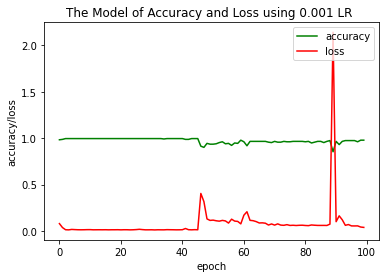

In [10]:
plt.plot(history.history["accuracy"], c="g")
plt.plot(history.history["loss"], c="r")
plt.title("The Model of Accuracy and Loss using 0.001 LR ")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

### Compile our model with different learning rate

dict_keys(['loss', 'accuracy'])
232/232 [==============================] - 0s 122us/step

accuracy: 96.12%
Confusion Matrix
True negatives:  115
False negatives:  0
False positives:  9
True positives:  108


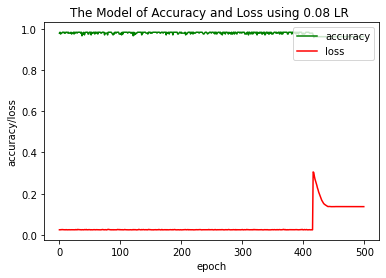

In [13]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics. 
adam = optimizers.Adam(learning_rate=0.02, beta_1=0.08, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer= adam, metrics= ["accuracy"])
# train the model by passing X and Y with 500 iterations
history= model.fit(X,Y, epochs=500,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])


# plotting the accuracy and loss model with 0.02 learning rate
plt.plot(history.history["accuracy"],c='g')
plt.plot(history.history["loss"],c='r')
plt.title("The Model of Accuracy and Loss using 0.08 LR ")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

- The accuracy of our model with 500 epochs and 0.02 learning rate  is 96.12%
- The confusion matrix can be interpreted as follows out of 232 observations in Voting records dataset, 223 observations were correctly predicted while 9 observations were incorrectly
- we can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 223/232= 0.9612 which gives 96.12%

dict_keys(['loss', 'accuracy'])
232/232 [==============================] - 0s 120us/step

accuracy: 98.28%
Confusion Matrix
True negatives:  120
False negatives:  0
False positives:  4
True positives:  108


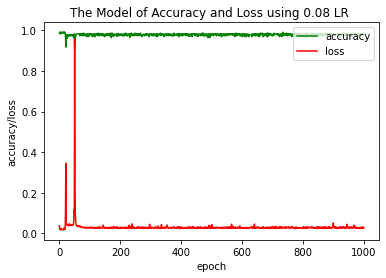

In [12]:
# compiling our model with binary_crossentropy for loss function, Adam  as optimizer default and the accuracy for out metrics. 
adam = optimizers.Adam(learning_rate=0.08, beta_1=0.005, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer= adam, metrics= ["accuracy"])

# train the model by passing X and Y with 1000 iterations
history= model.fit(X,Y, epochs=1000,verbose=0)
print(history.history.keys())

# Evaluate the model
scores = model.evaluate(X, Y)
scores

# the predicted model
Y_predict = model.predict(X)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])


# plotting the accuracy and loss model with 0.08 learning rate
plt.plot(history.history["accuracy"], c = 'g')
plt.plot(history.history["loss"], c = 'r')
plt.title("The Model of Accuracy and Loss using 0.08 LR ")
plt.ylabel("accuracy/loss")
plt.xlabel("epoch")
plt.legend(["accuracy", "loss"], loc="upper right")
plt.show()

- The accuracy of our model with 1000 epochs and 0.08 learning rate  is 98.28%
- The confusion matrix can be interpreted as follows out of 232 observations in Voting records dataset, 228 observations were correctly predicted while 4 were incorrectly predicted
- we can also calculate the accuracy by adding True negatives and True positive then divide the sum by the total number of observations: 228/232= 0.9828 which gives 98.28%